In [1]:
# ===============================================
# AI/ML Job Postings Dataset EDA & Visualization
# ===============================================

# Author: [ANKIT]
# Purpose: Provide a quick exploration and insights into AI/ML job postings
# Dataset columns: link, title, company, location, date, time, scrape_date, scrape_time

# -------------------------------
# 1. Import libraries
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")

In [2]:
# -------------------------------
# 2. Load dataset
# -------------------------------
df = pd.read_csv("/kaggle/input/ai-and-ml-job-postings-linkedin-and-indeed-2025/merged_jobs.csv", parse_dates=["date", "scrape_date"])

# Quick peek
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1550, 8)


,link,title,company,location,date,time,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=4a19059bdcb5e4d3,AI Engineer,Mercari India,"KA, IN",2025-09-18,16:44:51,2025-09-18,16:44:51
1,https://in.indeed.com/viewjob?jk=66e462502377423a,AI Engineer,COGNNA,"Remote, IN",2025-09-18,16:44:51,2025-09-18,16:44:51
2,https://www.linkedin.com/jobs/view/4302416525,"Data Scientist (Search, eCommerce, AI/ML)",CG-VAK Software & Exports Ltd.,"Pune, Maharashtra, India",2025-09-18,17:18:02,2025-09-18,17:18:02
3,https://www.linkedin.com/jobs/view/4302415638,"Head Data Scientist (Search, eCommerce, AI/ML)",CG-VAK Software & Exports Ltd.,"Pune, Maharashtra, India",2025-09-18,17:18:02,2025-09-18,17:18:02
4,https://www.linkedin.com/jobs/view/4300699261,Senior Machine Learning Engineer,Quantiphi,"Trivandrum, Kerala, India",2025-09-18,17:18:02,2025-09-18,17:18:02


In [3]:
# -------------------------------
# 3. Basic info & cleaning
# -------------------------------
# Check for missing values
print("Missing values per column:\n", df.isna().sum())

# Remove duplicates (just in case)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Normalize text columns
df['title'] = df['title'].str.strip().str.title()
df['company'] = df['company'].str.strip().str.title()
df['location'] = df['location'].str.strip()

Missing values per column:
 link             0
title            0
company          1
location       239
date             0
time             0
scrape_date      0
scrape_time      0
dtype: int64
Shape after dropping duplicates: (1550, 8)


In [4]:
# -------------------------------
# 4. Summary statistics
# -------------------------------
print("Unique companies:", df['company'].nunique())
print("Unique job titles:", df['title'].nunique())
print("Unique locations:", df['location'].nunique())

Unique companies: 667
Unique job titles: 495
Unique locations: 96


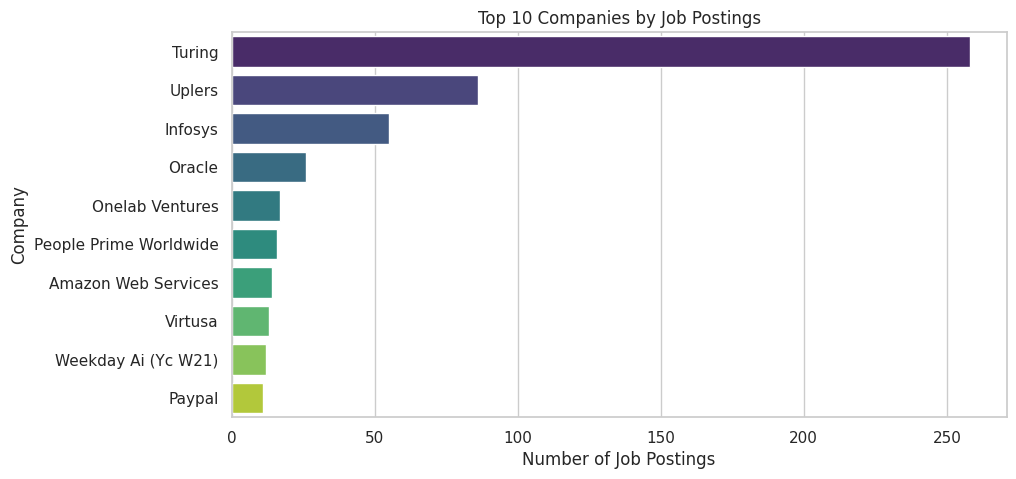

In [5]:
# -------------------------------
# 5. Top 10 companies by job postings
# -------------------------------
top_companies = df['company'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")
plt.title("Top 10 Companies by Job Postings")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company")
plt.show()

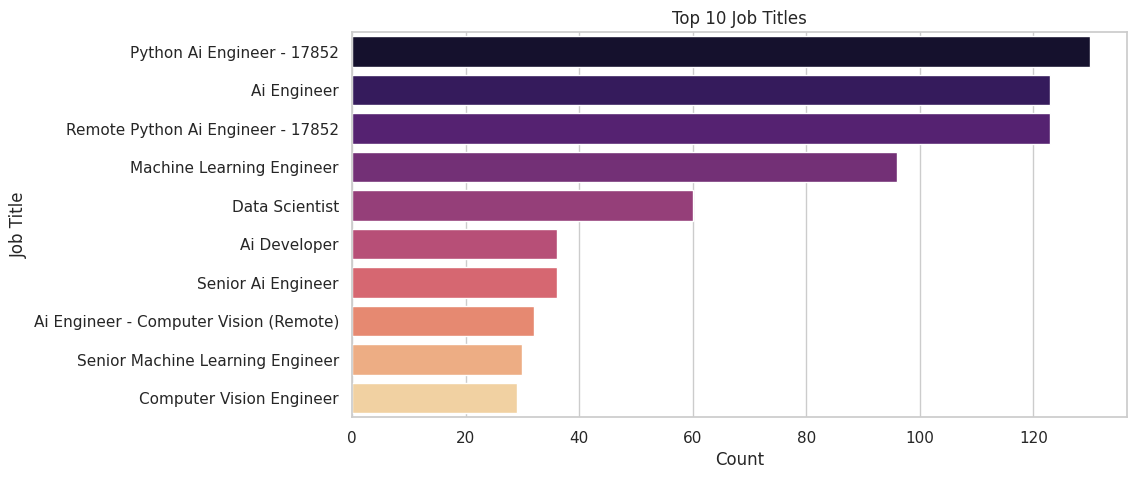

In [6]:
# -------------------------------
# 6. Top 10 job titles
# -------------------------------
top_titles = df['title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="magma")
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


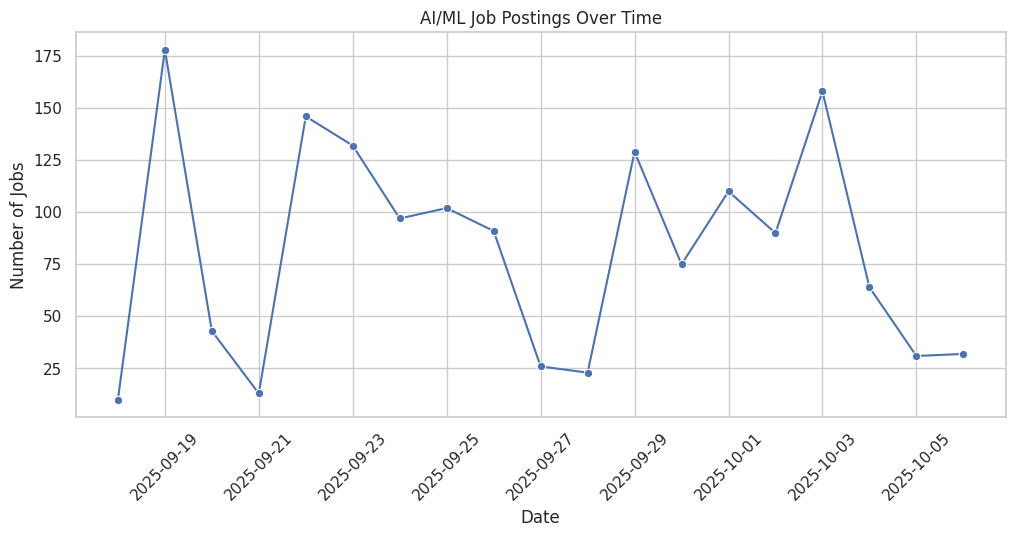

In [7]:
# -------------------------------
# 7. Job postings over time
# -------------------------------
df_time = df.groupby('date').size().reset_index(name='job_count')

plt.figure(figsize=(12,5))
sns.lineplot(data=df_time, x='date', y='job_count', marker='o')
plt.title("AI/ML Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.show()

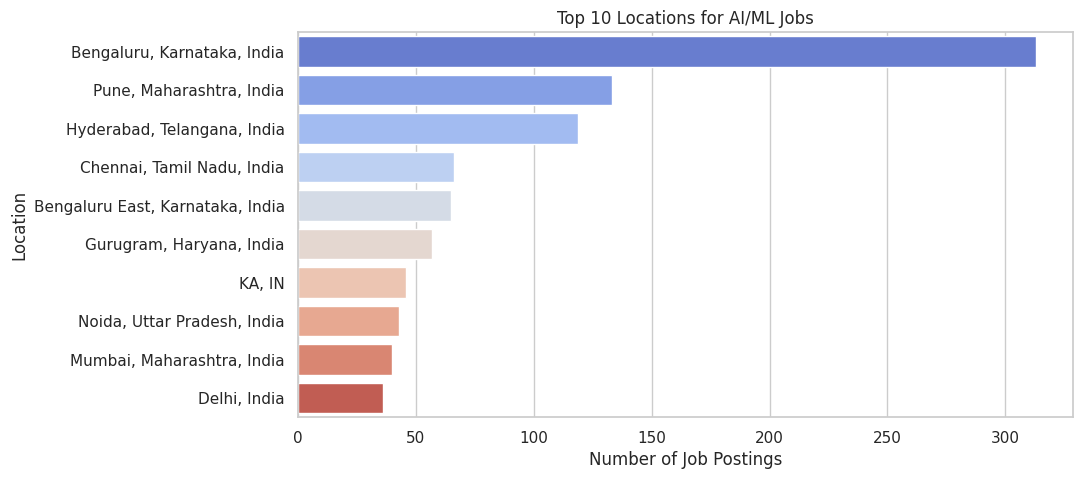

In [8]:
# -------------------------------
# 8. Locations distribution (top 10)
# -------------------------------
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="coolwarm")
plt.title("Top 10 Locations for AI/ML Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("Location")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

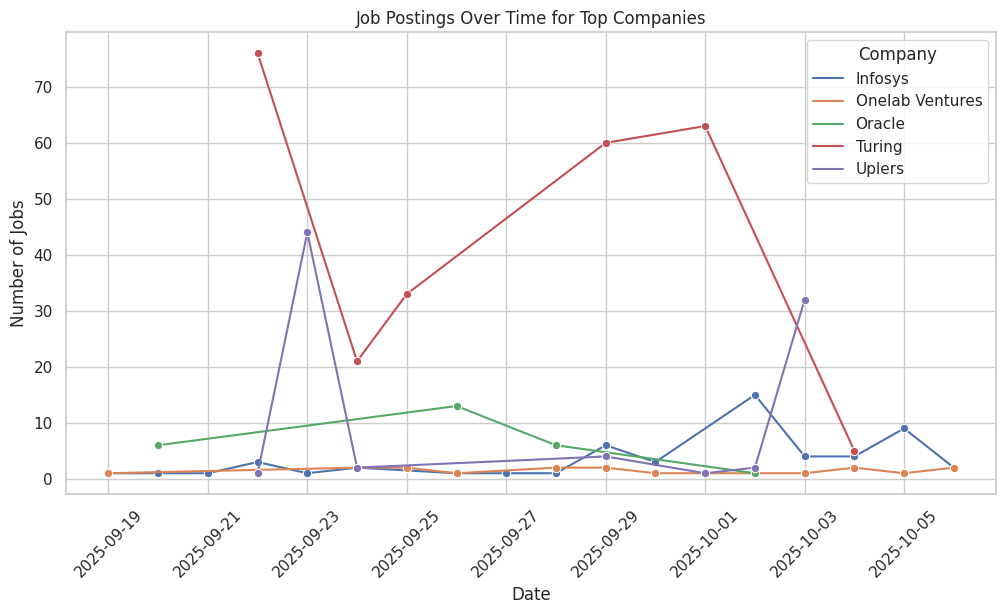

In [9]:
# -------------------------------
# 9. Jobs by company over time (sample)
# -------------------------------
sample_companies = df['company'].value_counts().head(5).index
df_sample = df[df['company'].isin(sample_companies)]
df_sample_time = df_sample.groupby(['date','company']).size().reset_index(name='job_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_sample_time, x='date', y='job_count', hue='company', marker='o')
plt.title("Job Postings Over Time for Top Companies")
plt.xlabel("Date")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.legend(title="Company")
plt.show()

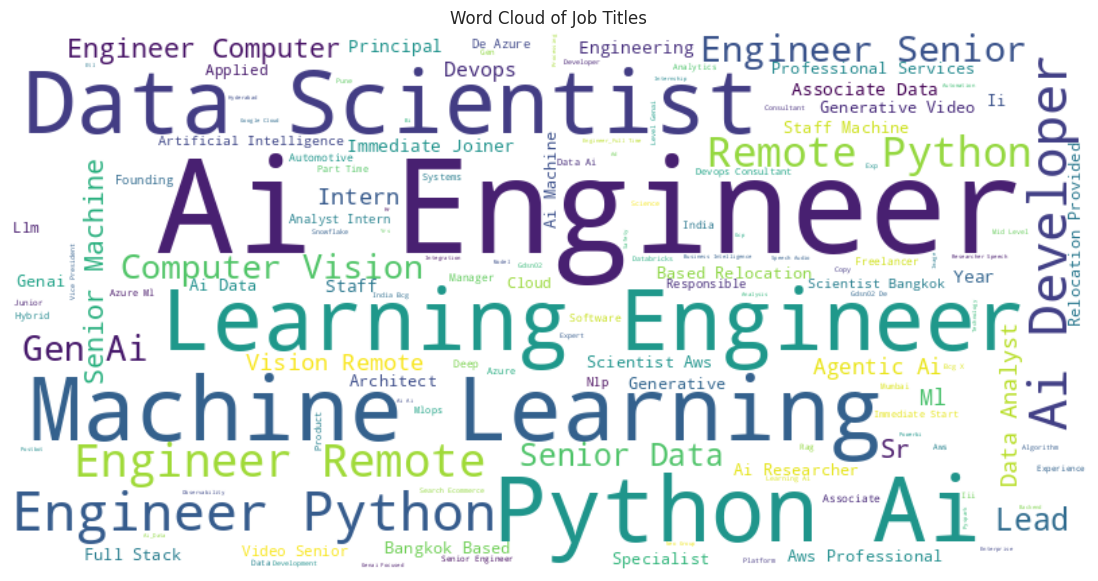

In [10]:
# -------------------------------
# 10. Optional: Simple word frequency in job titles
# -------------------------------
from wordcloud import WordCloud

all_titles = " ".join(df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Job Titles")
plt.show()

# -------------------------------
# End of EDA